In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
import seaborn as sns
import joblib

In [4]:
df = pd.read_csv('green_tech_data.csv')
df.head()

carbon_emissions  energy_output  renewability_index  cost_efficiency  \
0        181.089042     128.286267            0.642032         0.732568   
1        382.750007     672.769370            0.084140         2.891096   
2        306.197880     382.920383            0.161629         2.932858   
3        259.530469     557.713622            0.898554         3.368435   
4        104.606524     916.809827            0.606429         3.767411   

   sustainability  
0               1  
1               0  
2               0  
3               0  
4               0

In [5]:
df.isnull().sum()

carbon_emissions      0
energy_output         0
renewability_index    0
cost_efficiency       0
sustainability        0
dtype: int64

In [6]:
df.columns

Index(['carbon_emissions', 'energy_output', 'renewability_index',
       'cost_efficiency', 'sustainability'],
      dtype='object')

In [7]:
X = df[['carbon_emissions','energy_output','renewability_index','cost_efficiency']]
y = df['sustainability']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [15]:
# create a linear regression model
model = LogisticRegression()
# 
model.fit(X_train, y_train)

LogisticRegression()

In [17]:
y_pred=model.predict(X_test)

In [19]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print (accuracy*100)

95.0


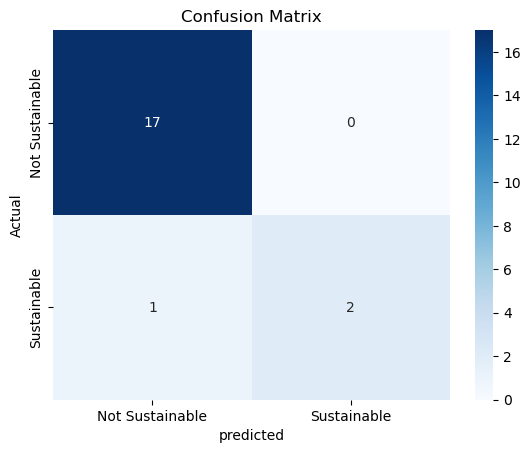

In [23]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap = 'Blues', xticklabels=['Not Sustainable','Sustainable'], yticklabels=['Not Sustainable','Sustainable'])
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [24]:
report = classification_report(y_pred, y_test, target_names = ['Not Sustainable','Sustainable'])
print(report)

                 precision    recall  f1-score   support

Not Sustainable       1.00      0.94      0.97        18
    Sustainable       0.67      1.00      0.80         2

       accuracy                           0.95        20
      macro avg       0.83      0.97      0.89        20
   weighted avg       0.97      0.95      0.95        20



In [27]:
pd.DataFrame(model.coef_.T, index = X.columns, columns = ['Coefficient'])

Coefficient
carbon_emissions      -0.023347
energy_output          0.001097
renewability_index     1.092184
cost_efficiency       -1.259560

In [29]:
joblib.dump(model,'green_tech_data_model.pkl')

['green_tech_data_model.pkl']

In [31]:
ce = float(input('enter the value of carbon emisssions:'))
eo = float(input('what is the enrgy output of the source:'))
ri = float(input("enter the value of renewability index:"))
cost_eff = float(input('enter the cost efficiency ratio:'))
new_data = np.array([[ce,eo,ri,cost_eff]])
prediction = model.predict(new_data)
print(f'the sustainability for energy source with carbon emission :{ce}, energy output:{eo} Wkh ')

enter the value of carbon emisssions: 311
what is the enrgy output of the source: 768
enter the value of renewability index: 0.36
enter the cost efficiency ratio: 1


the sustainability for energy source with carbon emission :311.0, energy output:768.0 Wkh 


C:\Users\rutuj\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from sklearn.tree import plot_tree
import seaborn as sns
import joblib

In [35]:
df = pd.read_csv('Renewable_Energy_Adoption.csv')
df.head()

carbon_emissions  energy_output  renewability_index  cost_efficiency  \
0        181.089042     128.286267            0.642032         0.732568   
1        382.750007     672.769370            0.084140         2.891096   
2        306.197880     382.920383            0.161629         2.932858   
3        259.530469     557.713622            0.898554         3.368435   
4        104.606524     916.809827            0.606429         3.767411   

   adoption  
0         1  
1         0  
2         0  
3         0  
4         0

In [37]:
df.isnull().sum()

carbon_emissions      0
energy_output         0
renewability_index    0
cost_efficiency       0
adoption              0
dtype: int64

In [39]:
df.columns

Index(['carbon_emissions', 'energy_output', 'renewability_index',
       'cost_efficiency', 'adoption'],
      dtype='object')

In [41]:
X = df[['carbon_emissions','energy_output','renewability_index','cost_efficiency']]
y = df['adoption']

In [43]:
df['adoption'].value_counts()

adoption
0    85
1    15
Name: count, dtype: int64

In [45]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X,y=smote.fit_resample(X,y)
y.value_counts()

adoption
1    85
0    85
Name: count, dtype: int64

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [49]:
# create a linear regression model
model = DecisionTreeClassifier(max_depth=3,random_state = 42)
# 
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [51]:
y_pred=model.predict(X_test)

In [53]:
y_pred

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1], dtype=int64)

In [55]:
accuracy = accuracy_score(y_test, y_pred)
print (accuracy*100)

100.0


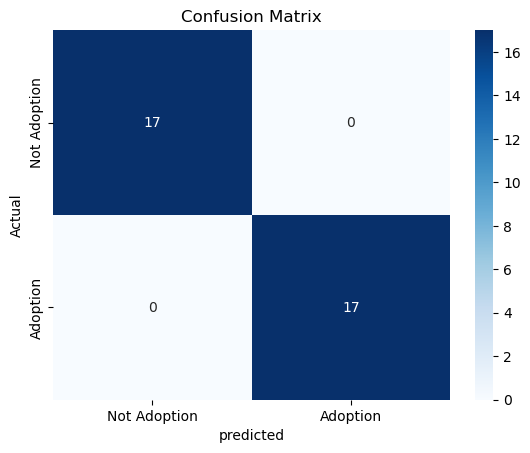

In [57]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap = 'Blues', xticklabels=['Not Adoption','Adoption'], yticklabels=['Not Adoption','Adoption'])
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [59]:
report = classification_report(y_pred, y_test, target_names = ['Not Adoption','Adoption'])
print(report)

              precision    recall  f1-score   support

Not Adoption       1.00      1.00      1.00        17
    Adoption       1.00      1.00      1.00        17

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



In [61]:
joblib.dump(model,'Renewable_Energy_Adoption_model.pkl')

['Renewable_Energy_Adoption_model.pkl']

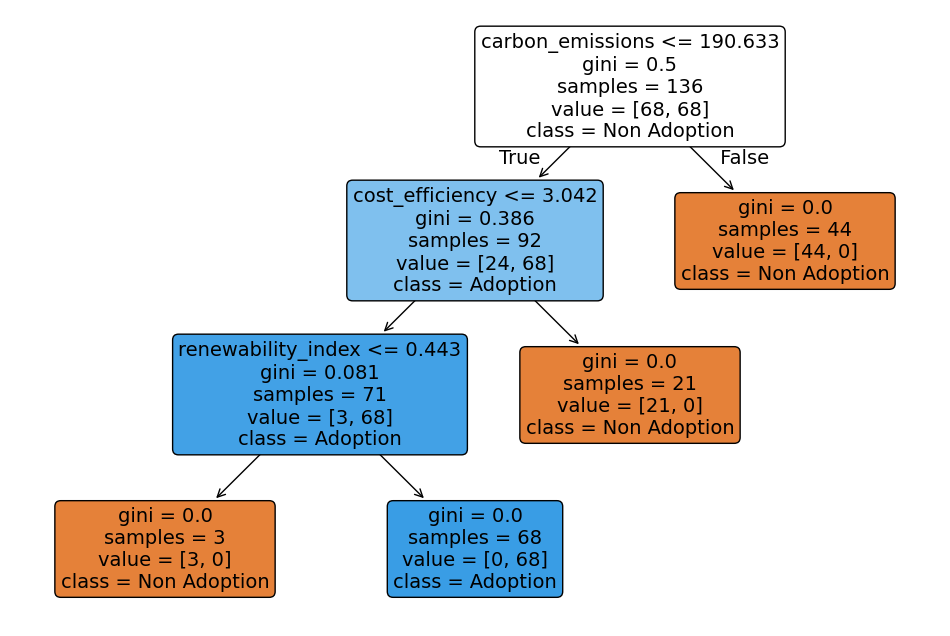

In [63]:
plt.figure(figsize=(12,8))
plot_tree(model, feature_names=X.columns, class_names=['Non Adoption','Adoption'],filled=True, rounded= True)
plt.savefig('dtl.png')
plt.show()

In [65]:
joblib.load('Renewable_Energy_Adoption_model.pkl')

DecisionTreeClassifier(max_depth=3, random_state=42)

In [67]:
ce = float(input('enter the value of carbon emisssions:'))
eo = float(input('what is the enrgy output of the source:'))
ri = float(input("enter the value of renewability index:"))
cost_eff = float(input('enter the cost efficiency ratio:'))
new_data = np.array([[ce,eo,ri,cost_eff]])
prediction = model.predict(new_data)
print(f'the sustainability for energy source with carbon emission :{ce}, energy output:{eo} Wkh, renewability:{ri} ')

enter the value of carbon emisssions: 181
what is the enrgy output of the source: 128
enter the value of renewability index: 0.36
enter the cost efficiency ratio: 1


the sustainability for energy source with carbon emission :181.0, energy output:128.0 Wkh, renewability:0.36 


C:\Users\rutuj\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [69]:
# Naive Bayes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
import seaborn as sns
import joblib

In [71]:
df = pd.read_csv('ecosystem_data.csv')
df.head()

water_quality  air_quality_index  biodiversity_index  vegetation_cover  \
0      37.454012         112.092246            0.729998         63.814457   
1      95.071431          99.873629            0.184512         45.929245   
2      73.199394          52.846174            0.346640         96.449852   
3      59.865848         182.180001            0.663281         21.897845   
4      15.601864         142.987248            0.482089         58.785642   

    soil_ph ecosystem_health  
0  5.144016         degraded  
1  4.021498         degraded  
2  4.194976         degraded  
3  4.493691         degraded  
4  4.620093         degraded

In [73]:
df['ecosystem_health'].unique()

array(['degraded', 'at risk', 'healthy'], dtype=object)

In [129]:
df['ecosystem_health']=df['ecosystem_health'].map({'healthy':0, 'at risk':1, 'degraded':2})

In [131]:
df.columns

Index(['water_quality', 'air_quality_index', 'biodiversity_index',
       'vegetation_cover', 'soil_ph', 'ecosystem_health'],
      dtype='object')

In [133]:
X = df[['water_quality','air_quality_index','biodiversity_index','vegetation_cover','soil_ph']]
y = df['ecosystem_health']

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [137]:
model = GaussianNB()
# 
model.fit(X_train, y_train)

GaussianNB()

In [139]:
y_pred=model.predict(X_test)

In [141]:
y_pred

array([2, 2, 1, ..., 2, 2, 2], dtype=int64)

In [143]:
accuracy = accuracy_score(y_test, y_pred)
print (accuracy*100)

95.15


In [145]:
report = classification_report(y_pred, y_test, target_names = ['healthy','at risk','degraded'])
print(report)

              precision    recall  f1-score   support

     healthy       0.29      0.86      0.43         7
     at risk       0.63      0.90      0.74       155
    degraded       1.00      0.96      0.98      1838

    accuracy                           0.95      2000
   macro avg       0.64      0.91      0.72      2000
weighted avg       0.97      0.95      0.96      2000



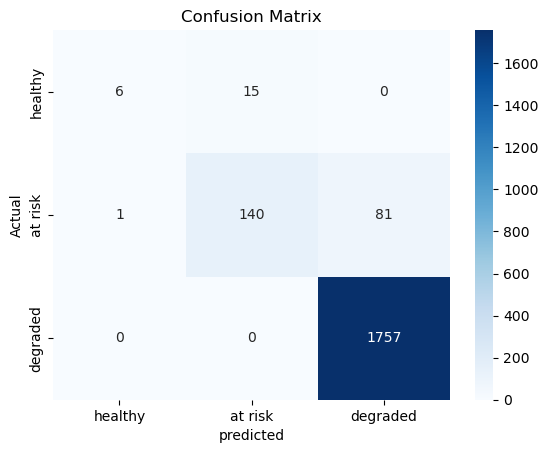

In [147]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap = 'Blues', xticklabels=['healthy','at risk', 'degraded'], yticklabels=['healthy','at risk','degraded'])
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [149]:
joblib.dump(model,'Ecosystem_Health_Calculator.pkl')

['Ecosystem_Health_Calculator.pkl']

In [151]:
eco_health = joblib.load('Ecosystem_Health_Calculator.pkl')

In [153]:
X.columns

Index(['water_quality', 'air_quality_index', 'biodiversity_index',
       'vegetation_cover', 'soil_ph'],
      dtype='object')

In [155]:
df.describe()

water_quality  air_quality_index  biodiversity_index  vegetation_cover  \
count   10000.000000       10000.000000        10000.000000      10000.000000   
mean       49.415956         151.358963            0.500050         49.871338   
std        28.763013          86.788365            0.286774         28.899459   
min         0.001163           0.047323            0.000048          0.000554   
25%        24.632887          76.183740            0.253748         24.685725   
50%        49.252862         151.769033            0.502068         50.003024   
75%        74.000635         226.943766            0.744674         74.711625   
max        99.971767         299.977448            0.999901         99.978937   

            soil_ph  ecosystem_health  
count  10000.000000      10000.000000  
mean       6.232751          1.864200  
std        1.591063          0.375729  
min        3.500092          0.000000  
25%        4.843497          2.000000  
50%        6.215445          2.000000  
75%        7.627624          2.000000  
max        8.999847          2.000000

In [ ]:
'''wq = float(input('enter the water quality:')) 
aqi = float(input('enter AQI:')) 
bdi = float(input('enter BDI:'))
vc = float(input('enter the vegitation cover:')) 
sph = float(input('enter soil pH:')) 
new_df= np.array([[wq, aqi, bdi, vc, sph]]) 
prediction = eco_health.predict(new_df) print(f'the ecosystem for water quality {wq}, AQI {aqi}, BDI {bdi}, vegitation cover {vc}, soil pH{sph} is {prediction[0]}')'''

In [159]:
y.value_counts()

ecosystem_health
2    8761
1    1120
0     119
Name: count, dtype: int64

In [185]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X,y=smote.fit_resample(X,y)
y.value_counts()

ecosystem_health
2    8761
1    8761
0    8761
Name: count, dtype: int64

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [189]:
model = GaussianNB()
# 
model.fit(X_train, y_train)

GaussianNB()

In [191]:
y_pred=model.predict(X_test)

In [193]:
y_pred

array([1, 1, 2, ..., 1, 0, 2], dtype=int64)

In [195]:
accuracy = accuracy_score(y_test, y_pred)
print (accuracy*100)

94.63572379684231


In [197]:
report = classification_report(y_pred, y_test, target_names = ['healthy','at risk','degraded'])
print(report)

              precision    recall  f1-score   support

     healthy       0.97      0.93      0.95      1840
     at risk       0.92      0.92      0.92      1735
    degraded       0.95      0.99      0.97      1682

    accuracy                           0.95      5257
   macro avg       0.95      0.95      0.95      5257
weighted avg       0.95      0.95      0.95      5257



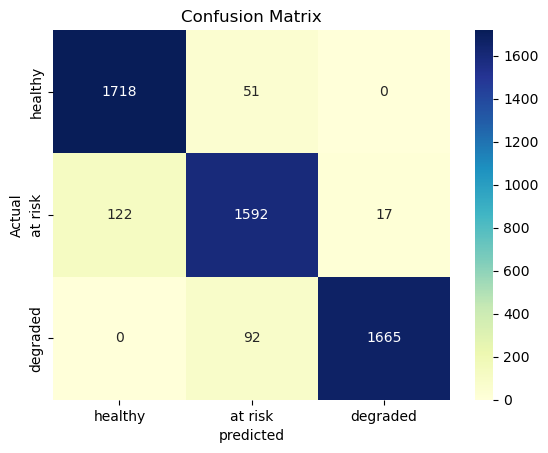

In [218]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap = 'YlGnBu', xticklabels=['healthy','at risk', 'degraded'], yticklabels=['healthy','at risk','degraded'])
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [141]:
joblib.dump(model,'Ecosystem_Health_Calculator.pkl')

['Ecosystem_Health_Calculator.pkl']

In [143]:
eco_health = joblib.load('Ecosystem_Health_Calculator.pkl')

In [220]:
# Naive Bayes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
import seaborn as sns
import joblib

In [222]:
df = pd.read_csv('Classifying waste_dataset(in).csv')
df.head()

Weight  Color  Texture  Odor     Type
0    0.81      1        0     0  Organic
1    1.91      1        1     1  Organic
2    1.49      1        1     0    Metal
3    1.24      0        0     1  Organic
4    0.40      1        1     0  Plastic

In [224]:
df['Type'].unique()

array(['Organic', 'Metal', 'Plastic'], dtype=object)

In [226]:
df['Type']=df['Type'].map({'Organic':0, 'Metal':1, 'Plastic':2})

In [228]:
df.columns

Index(['Weight', 'Color', 'Texture', 'Odor', 'Type'], dtype='object')

In [230]:
X = df[['Weight','Color','Texture','Odor']]
y = df['Type']

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [234]:
model = GaussianNB()
# 
model.fit(X_train, y_train)

GaussianNB()

In [236]:
y_pred=model.predict(X_test)

In [238]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [240]:
accuracy = accuracy_score(y_test, y_pred)
print (accuracy*100)

94.35


In [242]:
report = classification_report(y_pred, y_test, target_names = ['Organic','Metal','Plastic'])
print(report)

              precision    recall  f1-score   support

     Organic       1.00      1.00      1.00      1759
       Metal       0.00      0.00      0.00         0
     Plastic       1.00      0.53      0.69       241

    accuracy                           0.94      2000
   macro avg       0.67      0.51      0.56      2000
weighted avg       1.00      0.94      0.96      2000



C:\Users\rutuj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rutuj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rutuj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


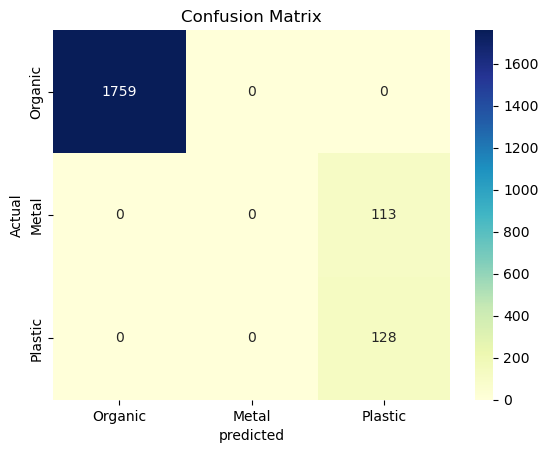

In [244]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap = 'YlGnBu', xticklabels=['Organic','Metal', 'Plastic'], yticklabels=['Organic','Metal','Plastic'])
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [246]:
joblib.dump(model,'Classifying_waste_data.pkl')

['Classifying_waste_data.pkl']

In [248]:
Type = joblib.load('Classifying_waste_data.pkl')

In [262]:
we = float(input('enter weight:'))
co = float(input('enter color:'))
te = float(input('enter texture:'))
od = float(input('enter odor:'))
new_df= np.array([[we, co, te, od]])
prediction = Type.predict(new_df)
print(f'the type for weight {we}, color {co}, texture {te}, odor {od} is {prediction[0]}')

enter weight: 0.8
enter color: 1
enter texture: 0
enter odor: 1


the type for weight 0.8, color 1.0, texture 0.0, odor 1.0 is 0


C:\Users\rutuj\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [256]:
df.describe()

Weight         Color      Texture          Odor          Type
count  10000.000000  10000.000000  10000.00000  10000.000000  10000.000000
mean       1.038863      0.493600      0.49780      0.500000      0.183900
std        0.546511      0.499984      0.50002      0.500025      0.526411
min        0.100000      0.000000      0.00000      0.000000      0.000000
25%        0.570000      0.000000      0.00000      0.000000      0.000000
50%        1.040000      0.000000      0.00000      0.500000      0.000000
75%        1.510000      1.000000      1.00000      1.000000      0.000000
max        2.000000      1.000000      1.00000      1.000000      2.000000

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from sklearn.tree import plot_tree
import seaborn as sns
import joblib

In [77]:
df = pd.read_csv('Classifying waste_dataset(in).csv')
df.head()

Weight  Color  Texture  Odor     Type
0    0.81      1        0     0  Organic
1    1.91      1        1     1  Organic
2    1.49      1        1     0    Metal
3    1.24      0        0     1  Organic
4    0.40      1        1     0  Plastic

In [268]:
df['Type'].unique()

array(['Organic', 'Metal', 'Plastic'], dtype=object)

In [270]:
df['Type']=df['Type'].map({'Organic':0, 'Metal':1, 'Plastic':2})

In [272]:
df.columns

Index(['Weight', 'Color', 'Texture', 'Odor', 'Type'], dtype='object')

In [274]:
X = df[['Weight','Color','Texture','Odor']]
y = df['Type']

In [276]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [278]:
# create a linear regression model
model = DecisionTreeClassifier(max_depth=3,random_state = 42)
# 
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [280]:
y_pred=model.predict(X_test)

In [282]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [284]:
accuracy = accuracy_score(y_test, y_pred)
print (accuracy*100)

94.35


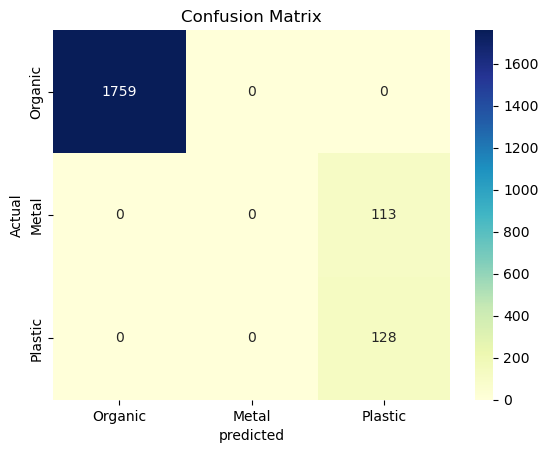

In [288]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap = 'YlGnBu', xticklabels=['Organic','Metal', 'Plastic'], yticklabels=['Organic','Metal','Plastic'])
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [290]:
report = classification_report(y_pred, y_test, target_names = ['Organic','Metal','Plastic'])
print(report)

              precision    recall  f1-score   support

     Organic       1.00      1.00      1.00      1759
       Metal       0.00      0.00      0.00         0
     Plastic       1.00      0.53      0.69       241

    accuracy                           0.94      2000
   macro avg       0.67      0.51      0.56      2000
weighted avg       1.00      0.94      0.96      2000



C:\Users\rutuj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rutuj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rutuj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [292]:
joblib.dump(model,'Classifying_waste_data.pkl')

['Classifying_waste_data.pkl']

In [294]:
Type = joblib.load('Classifying_waste_data.pkl')

In [296]:
we = float(input('enter weight:'))
co = float(input('enter color:'))
te = float(input('enter texture:'))
od = float(input('enter odor:'))
new_df= np.array([[we, co, te, od]])
prediction = Type.predict(new_df)
print(f'the type for weight {we}, color {co}, texture {te}, odor {od} is {prediction[0]}')

enter weight: 0.8
enter color: 1
enter texture: 0
enter odor: 1


the type for weight 0.8, color 1.0, texture 0.0, odor 1.0 is 0


C:\Users\rutuj\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [93]:
# unsupervised learning using k-means
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [95]:
data = pd.read_csv('environmental factors.csv')
data.head()

temperature   humidity  wind_speed  carbon_emissions  solar_irradiance  \
0    22.490802  52.418449   19.599966        337.165056        369.020837   
1    34.014286  49.974726    8.690240        256.681604        185.335998   
2    29.639879  40.569235   11.932794        484.024336        213.723302   
3    26.973170  66.436000   18.265613        148.540303        262.604015   
4    18.120373  58.597450   14.641787        314.535387        283.288001   

   pollution_level  
0        84.723658  
1        49.451704  
2        19.546561  
3        73.664179  
4        41.867814

In [97]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
pd.DataFrame(data_scaled, columns=data.columns).head()

temperature  humidity  wind_speed  carbon_emissions  solar_irradiance  \
0    -0.415900 -0.452465    0.801884          0.482494         -0.684316   
1     1.587377 -0.593258   -1.100359         -0.136414         -1.389866   
2     0.826917 -1.135149   -0.534981          1.611824         -1.280827   
3     0.363328  0.355146    0.569224         -0.968007         -1.093072   
4    -1.175669 -0.096466   -0.062635          0.308475         -1.013623   

   pollution_level  
0         1.193409  
1        -0.029923  
2        -1.067119  
3         0.809835  
4        -0.292954

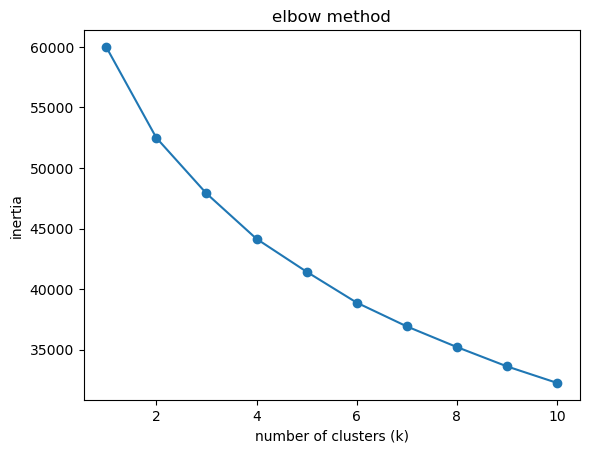

In [99]:
# use elbow method to find value of 'k'
inertia =[]
k_range = range(1,11)
for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
# plot the inertia values to find the 'elbow'
plt.plot(k_range, inertia, marker='o')
plt.title('elbow method')
plt.xlabel('number of clusters (k)')
plt.ylabel('inertia')
plt.show()

In [101]:
k = 2
kmeans = KMeans(n_clusters = k, random_state = 42)
data['cluster'] = kmeans.fit_predict(data_scaled)
data.head()

temperature   humidity  wind_speed  carbon_emissions  solar_irradiance  \
0    22.490802  52.418449   19.599966        337.165056        369.020837   
1    34.014286  49.974726    8.690240        256.681604        185.335998   
2    29.639879  40.569235   11.932794        484.024336        213.723302   
3    26.973170  66.436000   18.265613        148.540303        262.604015   
4    18.120373  58.597450   14.641787        314.535387        283.288001   

   pollution_level  cluster  
0        84.723658        1  
1        49.451704        0  
2        19.546561        0  
3        73.664179        1  
4        41.867814        0

In [103]:
# 
sil_score = silhouette_score (data_scaled, data['cluster'])
print (f'silhouette score :{sil_score}')

silhouette score :0.12329174489534976


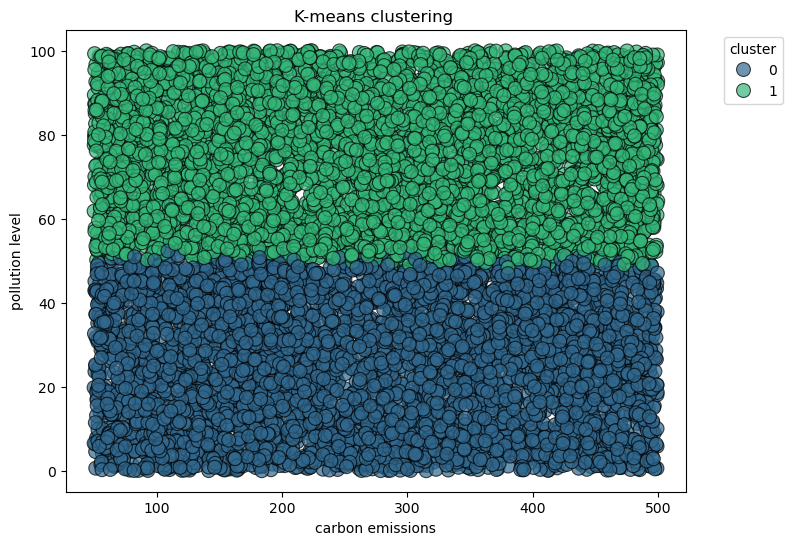

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.scatterplot(x= 'carbon_emissions',y='pollution_level',hue='cluster',data=data,palette='viridis',s=100,alpha=0.7,edgecolor='k')
plt.title('K-means clustering ')
plt.xlabel('carbon emissions')
plt.ylabel('pollution level')
plt.legend(title='cluster', bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()

In [109]:
# unsupervised learning using k-means
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [113]:
data = pd.read_excel('Iris.xlsx')
data.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [127]:
data = data.drop(columns=['Species'], errors='ignore')

In [133]:
data

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

In [1]:
# unsupervised learning using k-means
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [5]:
data = pd.read_csv('environmental_socioeconomic.csv')
data.head()

co2_emissions  waste_production           gdp    population
0     218.543053        436.276737  39199.932440  6.417631e+07
1     477.821438        399.620887  17380.479824  4.646995e+07
2     379.397274        258.538521  23865.587775  9.648535e+07
3     319.396318        646.540003  36531.225474  2.267887e+07
4     120.208388        528.961744  29283.573781  5.919779e+07

In [7]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
pd.DataFrame(data_scaled, columns=data.columns).head()

co2_emissions  waste_production       gdp  population
0      -0.415900         -0.452465  0.801884    0.482494
1       1.587377         -0.593258 -1.100359   -0.136414
2       0.826917         -1.135149 -0.534981    1.611824
3       0.363328          0.355146  0.569224   -0.968007
4      -1.175669         -0.096466 -0.062635    0.308475

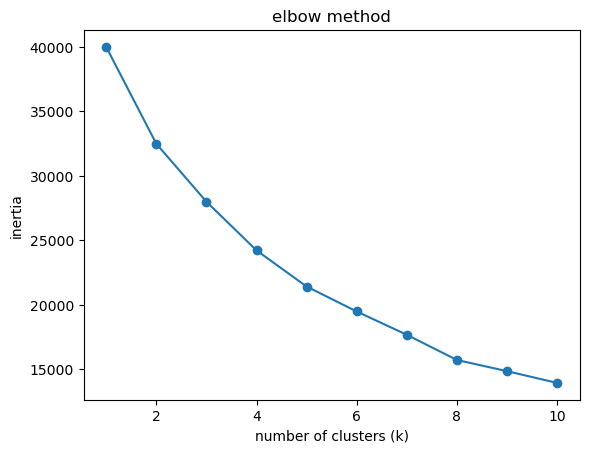

In [9]:
# use elbow method to find value of 'k'
inertia =[]
k_range = range(1,11)
for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
# plot the inertia values to find the 'elbow'
plt.plot(k_range, inertia, marker='o')
plt.title('elbow method')
plt.xlabel('number of clusters (k)')
plt.ylabel('inertia')
plt.show()

In [11]:
k = 8
kmeans = KMeans(n_clusters = k, random_state = 42)
data['cluster'] = kmeans.fit_predict(data_scaled)
data.head()

co2_emissions  waste_production           gdp    population  cluster
0     218.543053        436.276737  39199.932440  6.417631e+07        5
1     477.821438        399.620887  17380.479824  4.646995e+07        6
2     379.397274        258.538521  23865.587775  9.648535e+07        6
3     319.396318        646.540003  36531.225474  2.267887e+07        7
4     120.208388        528.961744  29283.573781  5.919779e+07        5

In [13]:
# 
sil_score = silhouette_score (data_scaled, data['cluster'])
print (f'silhouette score :{sil_score}')

silhouette score :0.22259343432582118


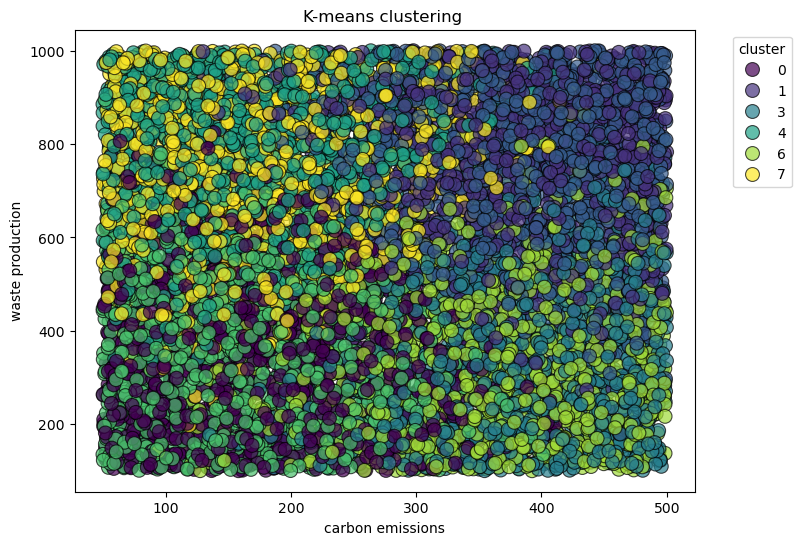

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.scatterplot(x= 'co2_emissions',y='waste_production',hue='cluster',data=data,palette='viridis',s=100,alpha=0.7,edgecolor='k')
plt.title('K-means clustering ')
plt.xlabel('carbon emissions')
plt.ylabel('waste production')
plt.legend(title='cluster', bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()

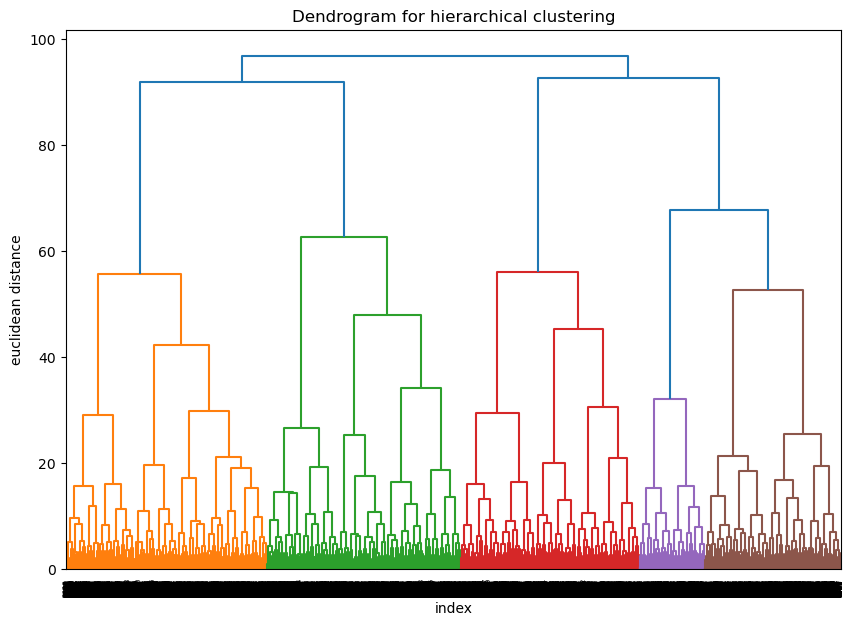

In [26]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
# Create a dendrogram
plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method = 'ward'))
plt.title('Dendrogram for hierarchical clustering')
plt.xlabel('index')
plt.ylabel('euclidean distance')
plt.show()

In [40]:
# apply agglomerative clustering
# lets assume we decide on 7 clusters based on the dendrogram
hierarchical_clustering = AgglomerativeClustering(n_clusters=5,metric='euclidean',linkage='ward')
data['cluster']=hierarchical_clustering.fit_predict(data_scaled)

In [41]:
# display the first few rows with cluster labels
data.head()

co2_emissions  waste_production           gdp    population  cluster
0     218.543053        436.276737  39199.932440  6.417631e+07        1
1     477.821438        399.620887  17380.479824  4.646995e+07        2
2     379.397274        258.538521  23865.587775  9.648535e+07        2
3     319.396318        646.540003  36531.225474  2.267887e+07        0
4     120.208388        528.961744  29283.573781  5.919779e+07        0

In [42]:
# 
sil_score = silhouette_score (data_scaled, data['cluster'])
print (f'silhouette score :{sil_score}')

silhouette score :0.1248063320884076


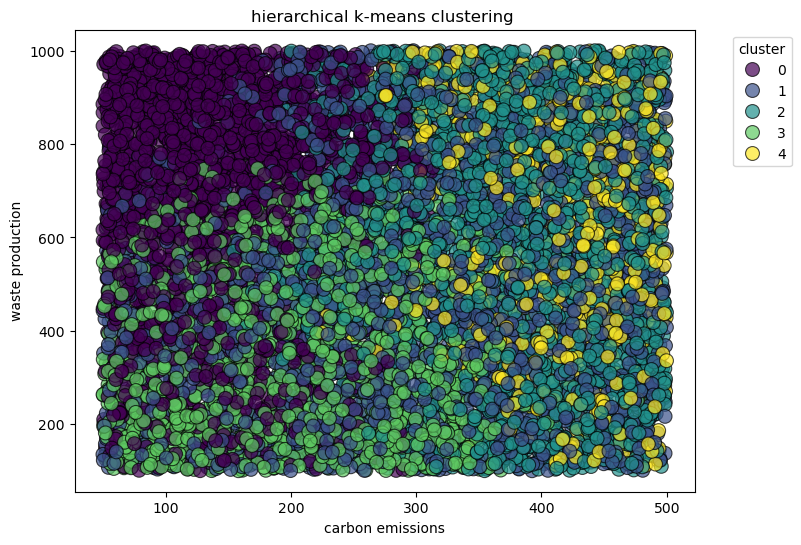

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.scatterplot(x= 'co2_emissions',y='waste_production',hue='cluster',data=data,palette='viridis',s=100,alpha=0.7,edgecolor='k')
plt.title('hierarchical k-means clustering ')
plt.xlabel('carbon emissions')
plt.ylabel('waste production')
plt.legend(title='cluster', bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [66]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [68]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [70]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

In [142]:
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [76]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [78]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [80]:
scaled_data = scaler.transform(df)

In [82]:
from sklearn.decomposition import PCA

In [84]:
pca = PCA(n_components=2)

In [86]:
pca.fit(scaled_data)

PCA(n_components=2)

In [88]:
X_new = pca.transform(scaled_data)

In [90]:
scaled_data.shape

(569, 30)

In [92]:
X_new.shape

(569, 2)

Text(0, 0.5, 'Second Principal Component')

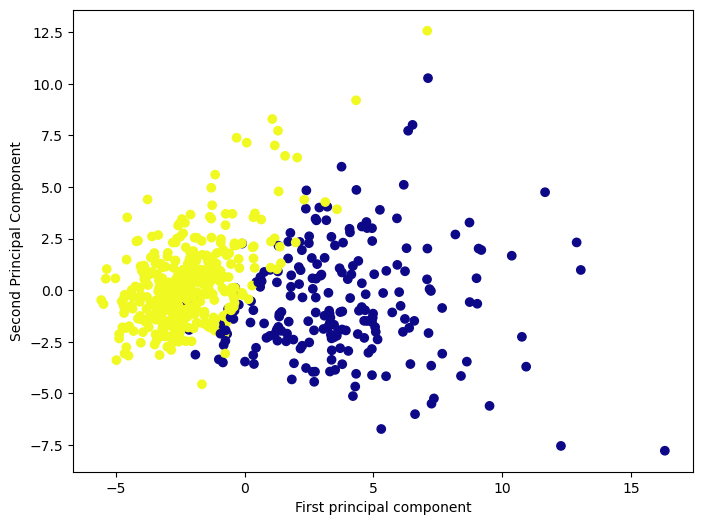

In [94]:
plt.figure(figsize=(8,6))
plt.scatter(X_new[:,0],X_new[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [96]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [98]:
pca.explained_variance_

array([13.30499079,  5.7013746 ])

In [100]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [102]:
data = pd.read_csv('green transportation system.csv')
data.head()

energy_efficiency  co2_emissions  electric_vehicle_penetration  \
0          17.490802     106.046123                     46.499916   
1          29.014286      99.936814                     19.225600   
2          24.639879      76.423087                     27.331985   
3          21.973170     141.090001                     43.164032   
4          13.120373     121.493624                     34.104467   

   cost_efficiency  public_transport_usage  
0         2.095361               27.934722  
1         1.648231               15.689067  
2         2.911246               17.581553  
3         1.047446               20.840268  
4         1.969641               22.219200

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   energy_efficiency             10000 non-null  float64
 1   co2_emissions                 10000 non-null  float64
 2   electric_vehicle_penetration  10000 non-null  float64
 3   cost_efficiency               10000 non-null  float64
 4   public_transport_usage        10000 non-null  float64
dtypes: float64(5)
memory usage: 390.8 KB


In [106]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [124]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [126]:
scaler = StandardScaler()
scaler.fit(data)

StandardScaler()

In [128]:
scaled_data = scaler.transform(data)

In [130]:
from sklearn.decomposition import PCA

In [132]:
pca = PCA(n_components=2)

In [134]:
pca.fit(scaled_data)

PCA(n_components=2)

In [136]:
X_new = pca.transform(scaled_data)

In [138]:
scaled_data.shape

(10000, 5)

In [140]:
X_new.shape

(10000, 2)

Text(0, 0.5, 'Second Principal Component')

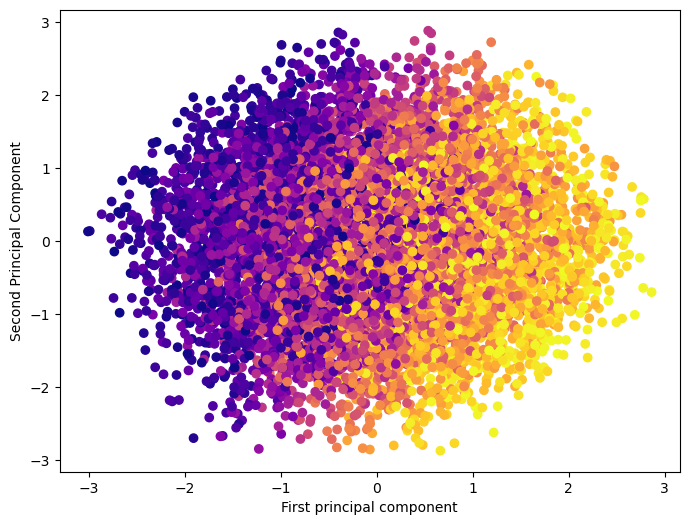

In [154]:
plt.figure(figsize=(8,6))
plt.scatter(X_new[:,0],X_new[:,1],c = data ['co2_emissions'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [14]:
df = pd.read_csv('energy_data.csv')
df.head()

timestamp     location  energy_consumption  temperature
0  1/1/2023 0:00   Industrial          139.101364    33.820542
1  1/1/2023 1:00  Residential          247.109808    26.392602
2  1/1/2023 2:00   Industrial          233.934693    25.027439
3  1/1/2023 3:00   Industrial          243.013532    27.107712
4  1/1/2023 4:00  Residential          313.502582    27.326153

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [16]:
df['timestamp']=pd.to_datetime(df['timestamp'])
df = df.dropna()
df = df.set_index('timestamp')

In [18]:
X = df[['energy_consumption','temperature']]

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

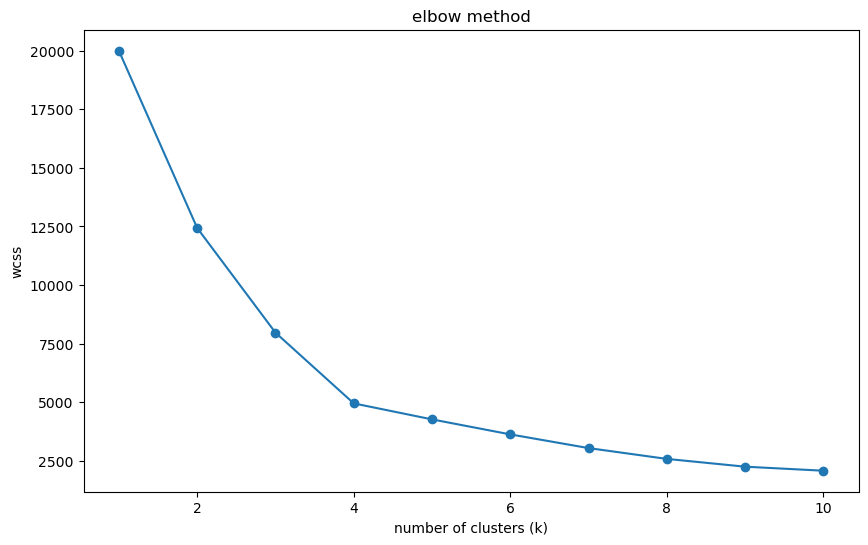

In [32]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
# plot the inertia values to find the 'elbow'
plt.figure(figsize = (10,6))
plt.plot(range(1,11), wcss, marker='o', linestyle='-')
plt.title('elbow method')
plt.xlabel('number of clusters (k)')
plt.ylabel('wcss')
plt.show()

In [57]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

In [47]:
# 
from sklearn.metrics import silhouette_score
sil_score = silhouette_score (X_scaled, data['cluster'])
print (f'silhouette score :{sil_score:.2f}')

silhouette score :0.36


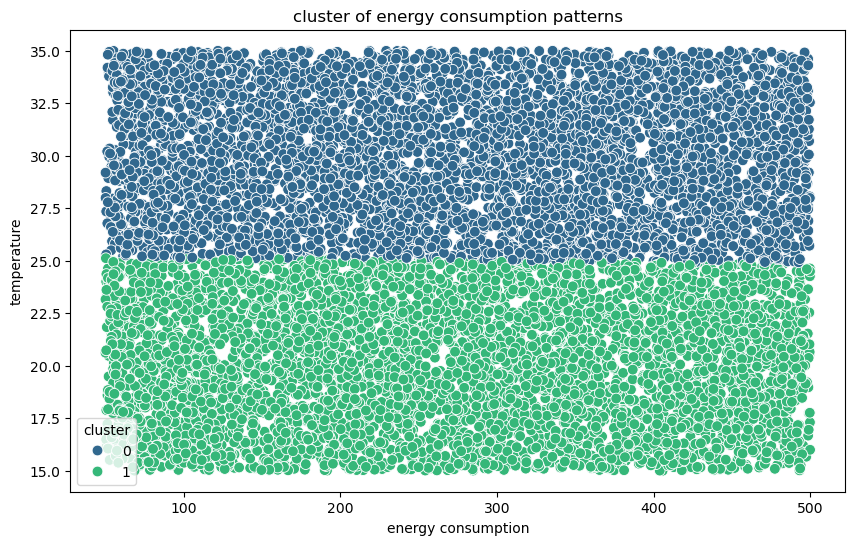

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.scatterplot(x= 'energy_consumption',y='temperature',hue='cluster',data=data,palette='viridis',s=60)
plt.title('cluster of energy consumption patterns')
plt.xlabel('energy consumption')
plt.ylabel('temperature')
plt.legend(title='cluster')
plt.show()